# SVR, GridSearchCV
## Module import

In [7]:
import os
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

## GridSearchCV training and testing

In [8]:
# Set the directory containing the CSV files
input_dir = '../../1-preprocessing/data/9-splits/USD'

# Create DataFrames to store the results
mse_results = pd.DataFrame(columns=['Offset', 'MSE'])
r2_results = pd.DataFrame(columns=['Offset', 'R2'])

# Define the hyperparameter grid
param_grid = {
    'tol': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.01, 0.001],
    'gamma': ['scale','auto'],
    'kernel': ['rbf','poly','sigmoid']
}

# Optimized
# param_grid = {
#     'tol': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
#     'C': [1, 10, 100],
#     'epsilon': [0.1, 0.01, 0.001],
#     'gamma': ['scale','auto'],
#     'kernel': ['rbf','poly','sigmoid']
# }

train_data = pd.read_csv(os.path.join(input_dir, "train_data.csv"))
test_data = pd.read_csv(os.path.join(input_dir, "test_data.csv"))

offset = 30

# Split the data into features and target
X_train = train_data.iloc[:, 1:1+5*offset]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, 1:1+5*offset]
y_test = test_data.iloc[:, -1]
            
# Initialize the SVR model
model = SVR()

# Perform grid search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_absolute_percentage_error',  # evaluation metric
    n_jobs=-1  # use all available CPU cores
)

# Fit the model
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

# Calculate the Directional Symmetry (hit rate)
hit_rate = (np.sign(y_pred) == np.sign(y_test)).mean()

# Print the results
print(f"Best parameters: {grid_search.best_params_}")
print("---")
print(f"Best  NMSE: {grid_search.best_score_:.3f}")
print("---")
print("Test set evaluation:")
print(f"MAPE: {mape:.3f}")
print(f"Directional Symmetry (hit rate): {hit_rate:.2f}")

Best parameters: {'C': 100, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'poly', 'tol': 0.1}
---
Best  NMSE: -1.398
---
Test set evaluation:
MAPE: 1.524
Directional Symmetry (hit rate): 0.83


## Plot test set and prediction set

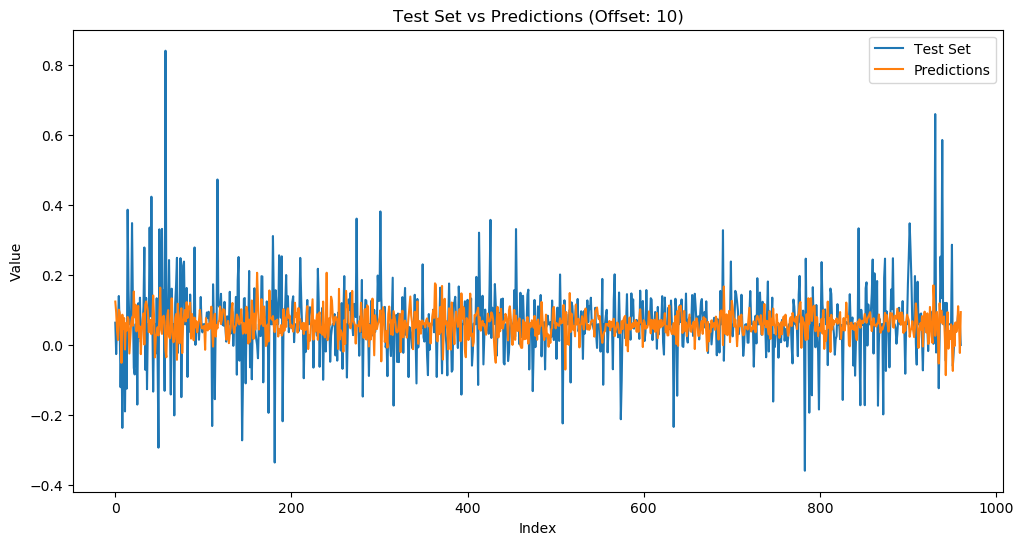

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Test Set')
plt.plot(y_pred, label='Predictions')
plt.title(f'Test Set vs Predictions (Offset: {offset})')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()